In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = pd.read_csv('sp500_ohlc.csv')
nasdaq = pd.read_csv('nasdaq_ohlc.csv')

In [3]:
nasdaq = nasdaq.loc[2:,:]
nasdaq.rename(columns={'Price':'Date'}, inplace=True)
print(nasdaq.columns)
nasdaq.set_index('Date', inplace=True)

nasdaq.index = pd.to_datetime(nasdaq.index)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


(array([-3653.,     0.,  3652.,  7305., 10957., 14610., 18262., 21915.]),
 [Text(-3653.0, 0, '1960'),
  Text(0.0, 0, '1970'),
  Text(3652.0, 0, '1980'),
  Text(7305.0, 0, '1990'),
  Text(10957.0, 0, '2000'),
  Text(14610.0, 0, '2010'),
  Text(18262.0, 0, '2020'),
  Text(21915.0, 0, '2030')])

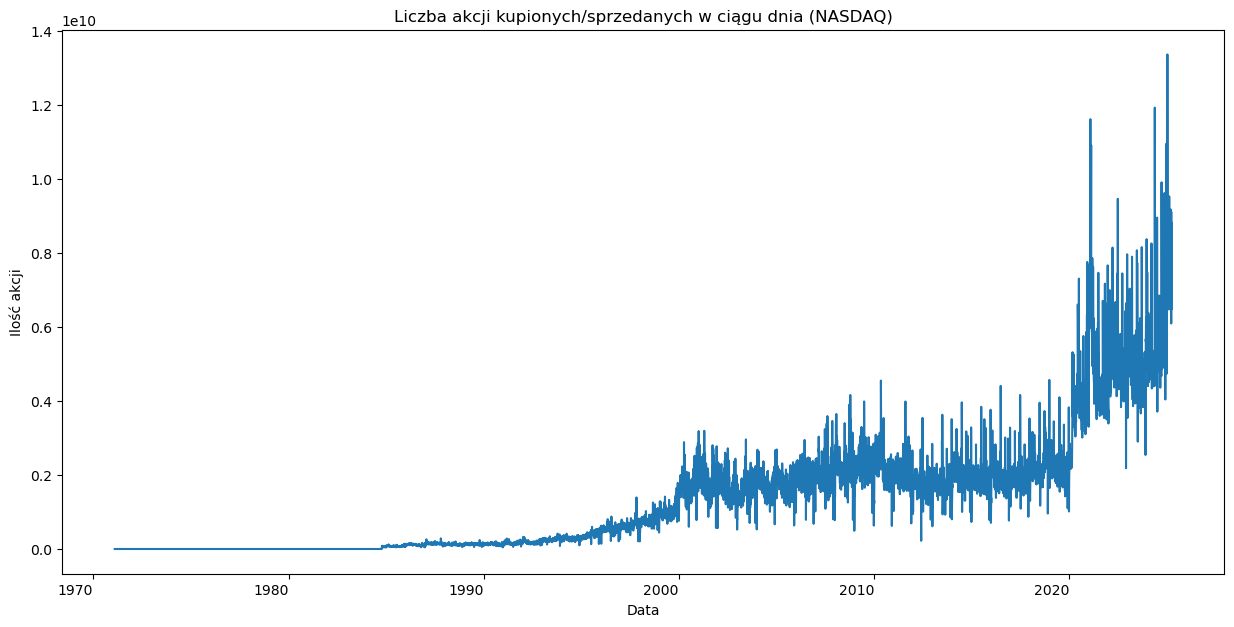

In [4]:
nasdaq = nasdaq.apply(pd.to_numeric)
nasdaq.iloc[:, -1].plot(figsize=(15,8), title='Liczba akcji kupionych/sprzedanych w ciągu dnia (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

nasdaq.iloc[:, -1].plot(figsize=(15,8), title='Liczba akcji kupionych/sprzedanych w ciągu dnia (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

(array([-3653.,     0.,  3652.,  7305., 10957., 14610., 18262., 21915.]),
 [Text(-3653.0, 0, '1960'),
  Text(0.0, 0, '1970'),
  Text(3652.0, 0, '1980'),
  Text(7305.0, 0, '1990'),
  Text(10957.0, 0, '2000'),
  Text(14610.0, 0, '2010'),
  Text(18262.0, 0, '2020'),
  Text(21915.0, 0, '2030')])

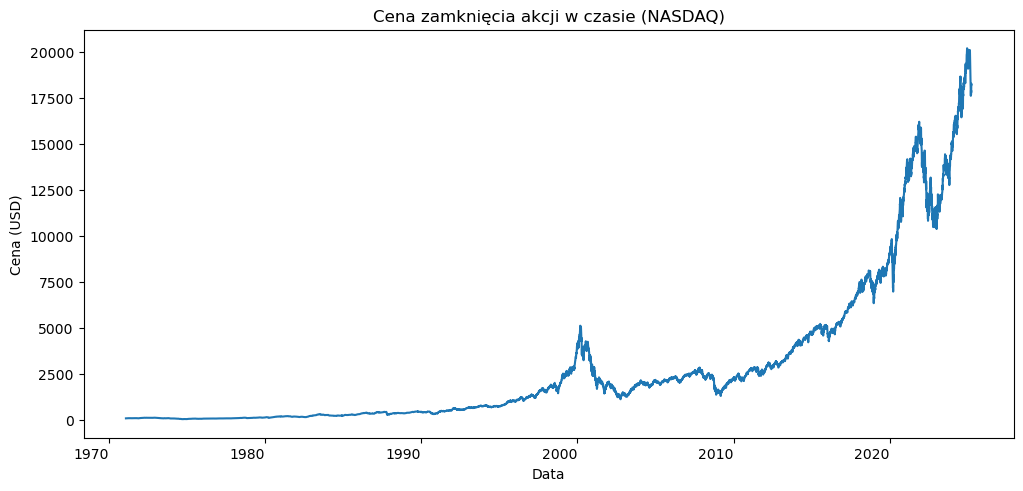

In [5]:
nasdaq.iloc[:, 1].plot(figsize=(12,6), title='Cena zamknięcia akcji w czasie (NASDAQ)', xlabel='Data', ylabel='Cena (USD)')
plt.xticks(rotation = 0)

In [6]:
sp500 = sp500.loc[2:,:]
sp500.rename(columns={'Price':'Date'}, inplace=True)
print(sp500.columns)
sp500.set_index('Date', inplace=True)

sp500.index = pd.to_datetime(sp500.index)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


(array([-18263., -10958.,  -3653.,   3652.,  10957.,  18262.,  25567.]),
 [Text(-18263.0, 0, '1920'),
  Text(-10958.0, 0, '1940'),
  Text(-3653.0, 0, '1960'),
  Text(3652.0, 0, '1980'),
  Text(10957.0, 0, '2000'),
  Text(18262.0, 0, '2020'),
  Text(25567.0, 0, '2040')])

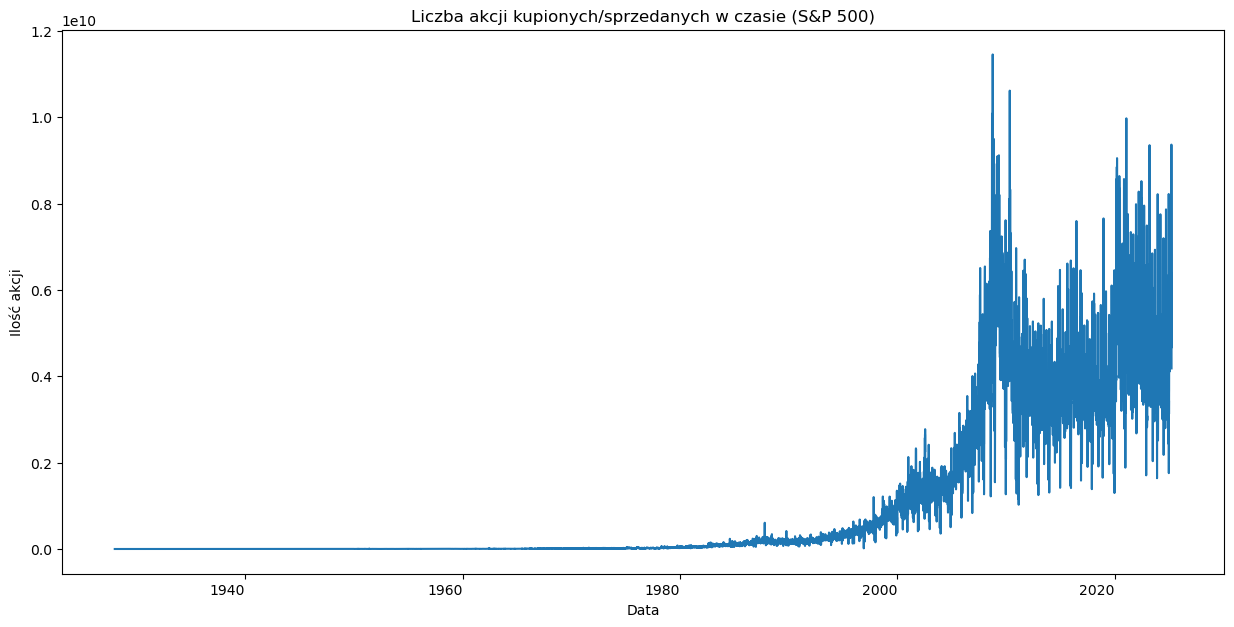

In [7]:
sp500 = sp500.apply(pd.to_numeric)
sp500.iloc[:, -1].plot(figsize=(15,8), title='Liczba akcji kupionych/sprzedanych w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

<AxesSubplot: title={'center': 'Cena zamknięcia akcji w czasie (S&P 500)'}, xlabel='Data', ylabel='Ilość akcji'>

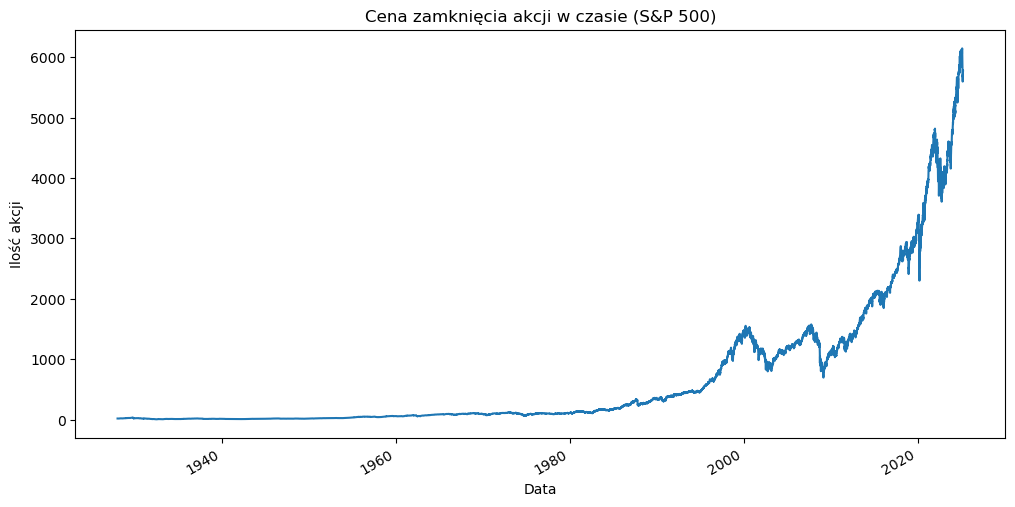

In [8]:
sp500.iloc[:, 1].plot(figsize=(12,6), title='Cena zamknięcia akcji w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')

### Wyodrębnienie danych tylko z 21 wieku (+ 50 wcześniejszych rekordów dla użycia okna czasowego)

In [9]:
nasdaq = nasdaq.loc['2000-01-01':]
sp500 = sp500.loc['2000-01-01':]

sp500.head()

,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [10]:
from extended_describe import extended_description

extended_description(nasdaq)

,Close,High,Low,Open,Volume
count,6346.000000,6346.000000,6346.000000,6346.000000,6.346000e+03
mean,5578.448866,5617.702220,5534.658156,5578.587830,2.587816e+09
std,4643.935008,4674.554618,4609.243352,4643.944074,1.469036e+09
min,1114.109985,1135.890015,1108.489990,1116.760010,2.214300e+08
25%,2193.144897,2209.432617,2175.154907,2194.230103,1.745538e+09
50%,3406.209961,3441.375000,3381.239990,3404.774902,2.003735e+09
75%,7587.847412,7642.677612,7527.495117,7586.167603,2.554415e+09
max,20173.890625,20204.580078,20004.730469,20114.980469,1.337113e+10
coeff_of_variation,0.832478,0.832111,0.832796,0.832459,5.676742e-01


In [11]:
extended_description(sp500)

,Close,High,Low,Open,Volume
count,6346.000000,6346.000000,6346.000000,6346.000000,6.346000e+03
mean,2146.117275,2158.152955,2132.572759,2145.856366,3.364841e+09
std,1288.620841,1294.376283,1282.073680,1288.491461,1.493192e+09
min,676.530029,695.270020,666.789978,679.280029,3.560700e+08
25%,1203.075012,1210.255005,1195.370026,1203.075012,2.232898e+09
50%,1499.029968,1509.649963,1490.159973,1498.119995,3.496190e+09
75%,2783.967468,2796.269958,2767.567444,2786.604980,4.185195e+09
max,6144.149902,6147.430176,6111.149902,6134.500000,1.145623e+10
coeff_of_variation,0.600443,0.599761,0.601186,0.600456,4.437632e-01


Na podstawie współczynnika zmienności można określić, że wartość ceny charakteryzuje się większą zmiennością niż wolumen, dla oby dwóch akcji, jednakże dla sp500 zmienność jest mniejsza.

Współczynniki korelacji Pearsona pomiędzy wartością zamknięcia a wolumenem: 0.85
Współczynniki linii najlepszego dopasowania:  [2.70133448e+05 1.08089022e+09]


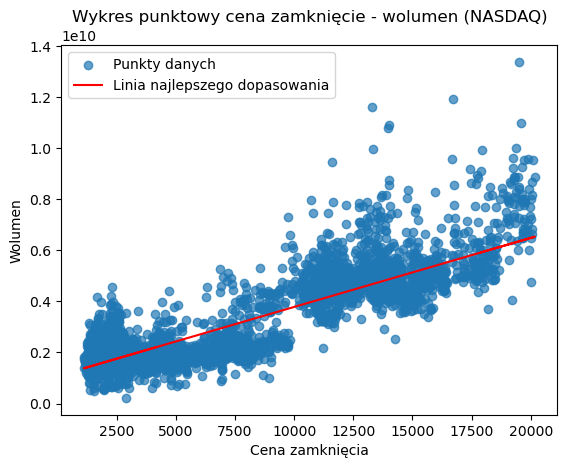

In [12]:
from utility import correlation

correlation(nasdaq['Close'], nasdaq['Volume'], "NASDAQ")

Współczynniki korelacji Pearsona pomiędzy wartością zamknięcia a wolumenem: 0.34
Współczynniki linii najlepszego dopasowania:  [3.92569958e+05 2.52233956e+09]


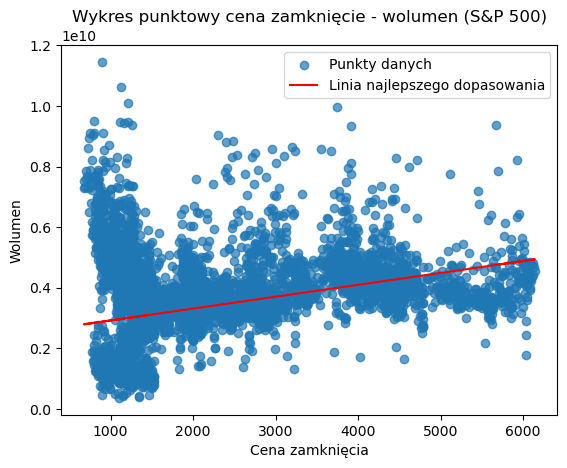

In [13]:
correlation(sp500['Close'], sp500['Volume'], "S&P 500")

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024'),
  Text(21184.0, 0, '2028')])

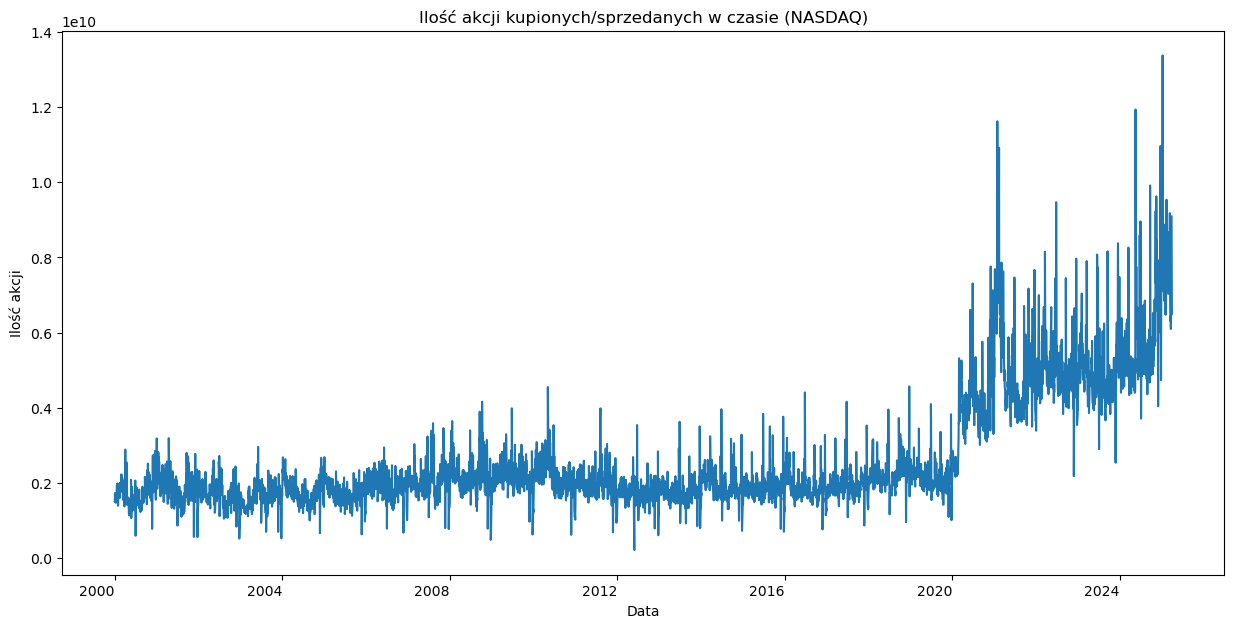

In [14]:
nasdaq.iloc[:, -1].plot(figsize=(15, 8), title='Ilość akcji kupionych/sprzedanych w czasie (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024'),
  Text(21184.0, 0, '2028')])

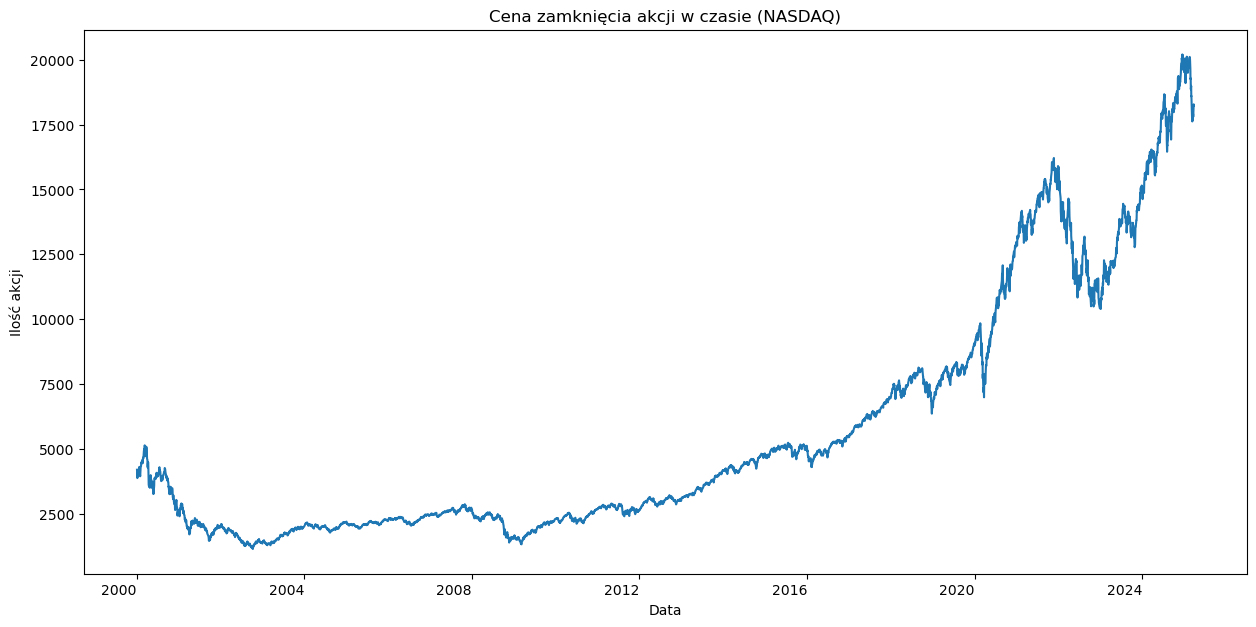

In [15]:
nasdaq.iloc[:, 1].plot(figsize=(15, 8), title='Cena zamknięcia akcji w czasie (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024'),
  Text(21184.0, 0, '2028')])

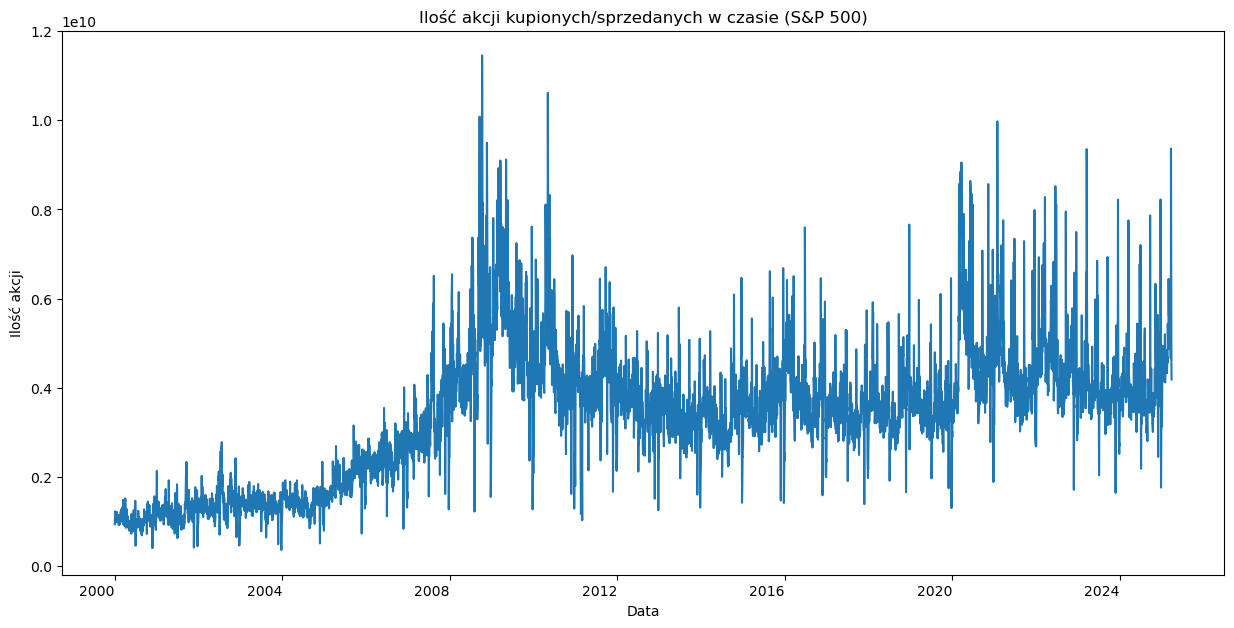

In [16]:
sp500.iloc[:, -1].plot(figsize=(15, 8), title='Ilość akcji kupionych/sprzedanych w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')
plt.xticks(rotation = 0)

### Kodowanie i obliczanie entropii

In [17]:
from encoding import calculate_encoding, calculate_entropy

alpha_values = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], dtype=float)
alpha_values

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

##### S&P 500

Obliczenie entropii - (-1, 0, 1) w zależności od α*σ, gdzie α = [0.05, 0.10, 0.15, ..., 1.00]

'Close'

In [18]:
sp500a = calculate_encoding(sp500.iloc[49:,:], 'Close', alpha=0.05)
for a in alpha_values:
    sp500a = calculate_encoding(sp500a, 'Close', alpha=a)

/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [19]:
alpha_values[0] = 0.05
results = []
for a in alpha_values:
    res = calculate_entropy(sp500a.iloc[1:,:], f'encoding_Close_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Close, alpha = {a}:', res)
    display(sp500a.iloc[1:,:][f'encoding_Close_{a}'].value_counts(normalize=True))


Entropia Shannona dla Close, alpha = 0.05: 1.1252706497881182


encoding_Close_0.05
-1    0.631036
 1    0.331321
 0    0.037643
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.15: 1.3019327635271967


encoding_Close_0.15
-1    0.583069
 1    0.322427
 0    0.094504
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.2: 1.3501797169184357


encoding_Close_0.2
-1    0.570203
 1    0.311785
 0    0.118011
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.25: 1.3986283269758937


encoding_Close_0.25
-1    0.553526
 1    0.300667
 0    0.145807
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.3: 1.4191067815080778


encoding_Close_0.3
-1    0.545584
 1    0.294632
 0    0.159784
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.35: 1.4329932685014561


encoding_Close_0.35
-1    0.541296
 1    0.286531
 0    0.172173
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.4: 1.4578838720914171


encoding_Close_0.4
-1    0.529225
 1    0.276525
 0    0.194250
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.45: 1.4721984285290344


encoding_Close_0.45
-1    0.522713
 1    0.263024
 0    0.214263
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.5: 1.50046765672319


encoding_Close_0.5
-1    0.499524
 0    0.251429
 1    0.249047
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.55: 1.5287489397758367


encoding_Close_0.55
-1    0.460451
 0    0.304003
 1    0.235546
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.6: 1.5386101486119217


encoding_Close_0.6
-1    0.410419
 0    0.369600
 1    0.219981
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.65: 1.5271167022688903


encoding_Close_0.65
 0    0.433926
-1    0.354511
 1    0.211563
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.7: 1.4843656497532907


encoding_Close_0.7
 0    0.504606
-1    0.290978
 1    0.204416
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.75: 1.411845554906477


encoding_Close_0.75
 0    0.571792
-1    0.228717
 1    0.199492
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.8: 1.2906904040375067


encoding_Close_0.8
 0    0.645013
 1    0.195839
-1    0.159149
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.85: 1.1449060226001806


encoding_Close_0.85
 0    0.707433
 1    0.190597
-1    0.101970
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.9: 1.0536553389938816


encoding_Close_0.9
 0    0.738882
 1    0.186626
-1    0.074492
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.95: 0.9758891841576842


encoding_Close_0.95
 0    0.763183
 1    0.181226
-1    0.055591
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 1.0: 0.8202176526340016


encoding_Close_1.0
 0    0.800667
 1    0.177414
-1    0.021919
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

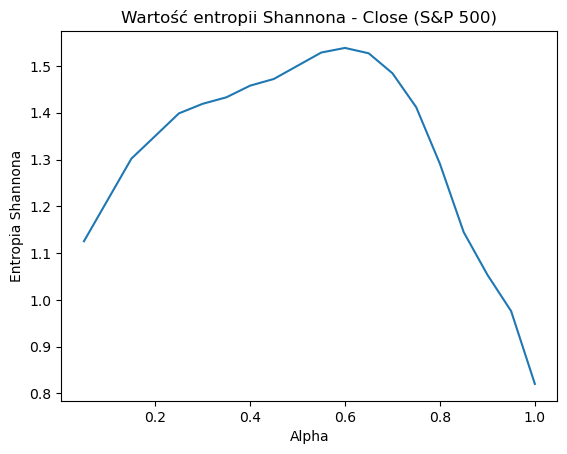

In [20]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Close (S&P 500)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

In [21]:
sp500a = calculate_encoding(sp500.iloc[49:,:], 'Volume', alpha=0.05)
for a in alpha_values:
    sp500a = calculate_encoding(sp500a, 'Volume', alpha=a)

/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [22]:
results = []
for a in alpha_values:
    res = calculate_entropy(sp500a.iloc[1:,:], f'encoding_Volume_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Volume, alpha = {a}:', res)
    display(sp500a.iloc[1:,:][f'encoding_Volume_{a}'].value_counts(normalize=True))


Entropia Shannona dla Volume, alpha = 0.05: 1.2507051989769533


encoding_Volume_0.05
 1    0.517154
-1    0.426302
 0    0.056544
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.15: 1.4715253614318915


encoding_Volume_0.15
 1    0.456957
-1    0.381512
 0    0.161531
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.2: 1.52554521550026


encoding_Volume_0.2
 1    0.428685
-1    0.363564
 0    0.207751
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.25: 1.561929035426243


encoding_Volume_0.25
 1    0.397872
-1    0.346410
 0    0.255718
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.3: 1.5794769673847937


encoding_Volume_0.3
 1    0.369917
-1    0.331321
 0    0.298761
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.35: 1.5842756689033766


encoding_Volume_0.35
 1    0.341963
 0    0.339104
-1    0.318933
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.4: 1.5789593928099444


encoding_Volume_0.4
 0    0.376588
 1    0.314962
-1    0.308450
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.45: 1.56500273408761


encoding_Volume_0.45
 0    0.412961
-1    0.297173
 1    0.289867
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.5: 1.5457974068077664


encoding_Volume_0.5
 0    0.444727
-1    0.288755
 1    0.266518
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.55: 1.525088957521265


encoding_Volume_0.55
 0    0.471410
-1    0.278748
 1    0.249841
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.6: 1.4966021796216165


encoding_Volume_0.6
 0    0.500794
-1    0.270807
 1    0.228399
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.65: 1.465743226896843


encoding_Volume_0.65
 0    0.527795
-1    0.262389
 1    0.209816
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.7: 1.438389260081976


encoding_Volume_0.7
 0    0.549079
-1    0.254924
 1    0.195997
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.75: 1.4086612186273217


encoding_Volume_0.75
 0    0.570203
-1    0.246823
 1    0.182973
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.8: 1.3737505401613839


encoding_Volume_0.8
 0    0.591804
-1    0.241582
 1    0.166614
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.85: 1.3440152008569068


encoding_Volume_0.85
 0    0.609593
-1    0.234435
 1    0.155972
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.9: 1.3105537613460008


encoding_Volume_0.9
 0    0.627700
-1    0.228717
 1    0.143583
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.95: 1.279764079552896


encoding_Volume_0.95
 0    0.643901
-1    0.221887
 1    0.134212
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 1.0: 1.2488014728975552


encoding_Volume_1.0
 0    0.659149
-1    0.215851
 1    0.125000
Name: proportion, dtype: float64

'Volume'

Text(0, 0.5, 'Entropia Shannona')

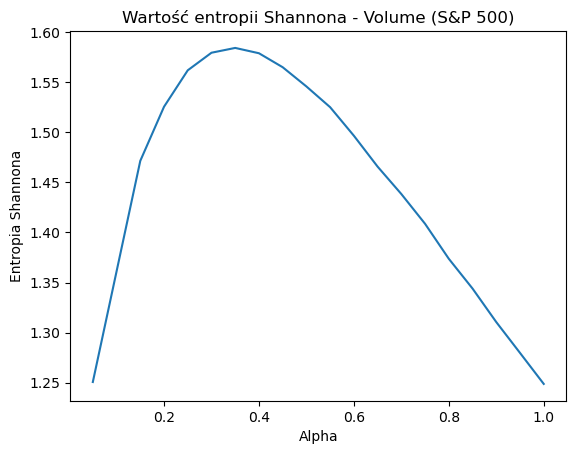

In [23]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Volume (S&P 500)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

Binarna entropia - (-1, 1)

In [24]:
sp500 = calculate_encoding(sp500.iloc[49:,:], 'Close', binary=True)
sp500 = calculate_encoding(sp500, 'Volume', binary=True)

/home/persi/Desktop/quant/encoding.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'binary_encoding_{column}'] = 0


In [25]:
print('Entropia Shannona dla Close:', calculate_entropy(sp500.iloc[1:,:], 'binary_encoding_Close'))
display(sp500.iloc[1:,:]['binary_encoding_Close'].value_counts(normalize=True))

print('Entropia Shannona dla Volume:', calculate_entropy(sp500.iloc[1:,:], 'binary_encoding_Volume'))
sp500.iloc[1:,:]['binary_encoding_Volume'].value_counts(normalize=True)


Entropia Shannona dla Close: 1.0016632800781942


binary_encoding_Close
 1    0.536055
-1    0.463469
 0    0.000476
Name: proportion, dtype: float64


Entropia Shannona dla Volume: 1.016590469487481


binary_encoding_Volume
-1    0.507147
 1    0.491105
 0    0.001747
Name: proportion, dtype: float64

In [26]:
sp500.loc[sp500['binary_encoding_Close'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
2000-03-14,1359.150024,1395.150024,1359.150024,1383.619995,1094000000,0,0
2003-01-10,927.570007,932.890015,917.659973,927.580017,1485400000,0,-1
2008-01-03,1447.160034,1456.800049,1443.729980,1447.550049,3429500000,0,-1
2017-01-10,2268.899902,2279.270020,2265.270020,2269.719971,3640560000,0,1


In [27]:
sp500.loc[sp500['binary_encoding_Volume'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
2000-03-14,1359.150024,1395.150024,1359.150024,1383.619995,1094000000,0,0
2004-04-01,1132.170044,1135.670044,1126.199951,1126.209961,1560700000,1,0
2010-08-10,1121.060059,1127.160034,1111.579956,1122.920044,3979360000,-1,0
2010-09-14,1121.099976,1127.359985,1115.579956,1121.160034,4521050000,-1,0
2010-10-14,1173.810059,1178.890015,1166.709961,1177.819946,4969410000,-1,0
2011-01-21,1283.349976,1291.209961,1282.069946,1283.630005,4935320000,1,0
2011-02-17,1340.430054,1341.500000,1331.000000,1334.369995,1966450000,1,0
2011-03-25,1313.800049,1319.180054,1310.150024,1311.800049,4223740000,1,0
2011-04-04,1332.869995,1336.739990,1329.099976,1333.560059,4223740000,1,0


##### NASDAQ

In [28]:
alpha_values = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], dtype=float)
alpha_values

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [29]:
nasdaq_a = calculate_encoding(nasdaq.iloc[49:,:], 'Close', alpha=0.05)
for a in alpha_values:
    nasdaq_a = calculate_encoding(nasdaq_a, 'Close', alpha=a)

/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [30]:
alpha_values[0] = 0.05
results = []
for a in alpha_values:
    res = calculate_entropy(nasdaq_a.iloc[1:,:], f'encoding_Close_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Close, alpha = {a}:', res)
    display(nasdaq_a.iloc[1:,:][f'encoding_Close_{a}'].value_counts(normalize=True))


Entropia Shannona dla Close, alpha = 0.05: 0.977989559519469


encoding_Close_0.05
-1    0.667726
 1    0.323062
 0    0.009212
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.15: 1.2294132019821042


encoding_Close_0.15
-1    0.619282
 1    0.306544
 0    0.074174
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.2: 1.3149462108354748


encoding_Close_0.2
-1    0.593393
 1    0.298126
 0    0.108482
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.25: 1.3661715338104643


encoding_Close_0.25
-1    0.574015
 1    0.292567
 0    0.133418
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.3: 1.4075856775495703


encoding_Close_0.3
-1    0.557497
 1    0.283196
 0    0.159307
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.35: 1.4468897388689697


encoding_Close_0.35
-1    0.538119
 1    0.272395
 0    0.189485
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.4: 1.47315484728755


encoding_Close_0.4
-1    0.522872
 1    0.258736
 0    0.218393
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.45: 1.489121390275413


encoding_Close_0.45
-1    0.510483
 1    0.248412
 0    0.241105
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.5: 1.5003295870558135


encoding_Close_0.5
-1    0.497618
 0    0.270013
 1    0.232370
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.55: 1.5140049006077887


encoding_Close_0.55
-1    0.471569
 0    0.311150
 1    0.217281
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.6: 1.5264570050943307


encoding_Close_0.6
-1    0.435356
 0    0.353399
 1    0.211245
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.65: 1.5266218357520294


encoding_Close_0.65
 0    0.415820
-1    0.378018
 1    0.206163
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.7: 1.4934230291832236


encoding_Close_0.7
 0    0.491423
-1    0.305432
 1    0.203145
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.75: 1.3797374968737848


encoding_Close_0.75
 0    0.594346
-1    0.206163
 1    0.199492
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.8: 1.171646911602494


encoding_Close_0.8
 0    0.695839
 1    0.196315
-1    0.107846
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.85: 1.0253451013168111


encoding_Close_0.85
 0    0.743964
 1    0.193933
-1    0.062103
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.9: 0.8758638252443427


encoding_Close_0.9
 0    0.781449
 1    0.191391
-1    0.027160
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.95: 0.7085298534091534


encoding_Close_0.95
 0    0.809562
 1    0.189803
-1    0.000635
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 1.0: 0.6983912423218118


encoding_Close_1.0
0    0.811468
1    0.188532
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

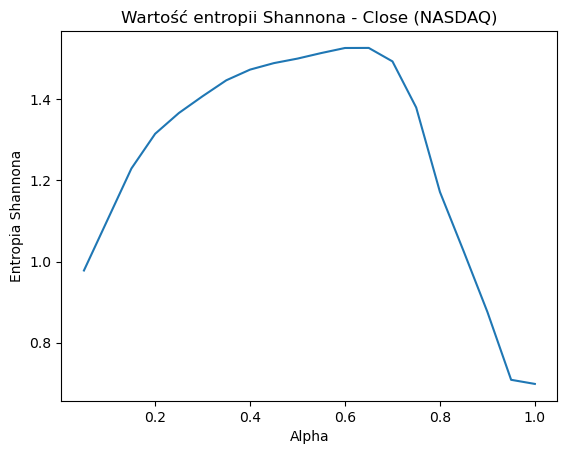

In [31]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Close (NASDAQ)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

'Volume'

In [32]:
nasdaq_a = calculate_encoding(nasdaq.iloc[49:,:], 'Volume', alpha=0.05)
for a in alpha_values:
    nasdaq_a = calculate_encoding(nasdaq_a, 'Volume', alpha=a)

/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [33]:
results = []
for a in alpha_values:
    res = calculate_entropy(nasdaq_a.iloc[1:,:], f'encoding_Volume_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Volume, alpha = {a}:', res)
    display(nasdaq_a.iloc[1:,:][f'encoding_Volume_{a}'].value_counts(normalize=True))


Entropia Shannona dla Volume, alpha = 0.05: 0.9262848745736632


encoding_Volume_0.05
-1    0.742058
 1    0.237611
 0    0.020330
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.15: 1.1064047028218835


encoding_Volume_0.15
-1    0.705210
 1    0.225699
 0    0.069091
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.2: 1.197172848297626


encoding_Volume_0.2
-1    0.677414
 1    0.220934
 0    0.101652
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.25: 1.2759995045724546


encoding_Volume_0.25
-1    0.646760
 1    0.218075
 0    0.135165
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.3: 1.3637140892789898


encoding_Volume_0.3
-1    0.603081
 1    0.216328
 0    0.180591
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.35: 1.4327355162753803


encoding_Volume_0.35
-1    0.557338
 0    0.229352
 1    0.213310
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.4: 1.4923489476916585


encoding_Volume_0.4
-1    0.498571
 0    0.290343
 1    0.211086
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.45: 1.5255442642623571


encoding_Volume_0.45
-1    0.430750
 0    0.360864
 1    0.208386
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.5: 1.5229661664072704


encoding_Volume_0.5
 0    0.435197
-1    0.358164
 1    0.206639
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.55: 1.4819063609843823


encoding_Volume_0.55
 0    0.507942
-1    0.287166
 1    0.204892
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.6: 1.4010735848487856


encoding_Volume_0.6
 0    0.580051
-1    0.216645
 1    0.203304
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.65: 1.2904639279888332


encoding_Volume_0.65
 0    0.644536
 1    0.199492
-1    0.155972
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.7: 1.182152474144727


encoding_Volume_0.7
 0    0.691391
 1    0.197903
-1    0.110705
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.75: 1.0806852674008183


encoding_Volume_0.75
 0    0.727128
 1    0.195203
-1    0.077668
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.8: 0.9877490859183004


encoding_Volume_0.8
 0    0.755241
 1    0.191550
-1    0.053208
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.85: 0.9136297670595341


encoding_Volume_0.85
 0    0.774778
 1    0.188691
-1    0.036531
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.9: 0.8496532028839554


encoding_Volume_0.9
 0    0.790184
 1    0.185515
-1    0.024301
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.95: 0.7925108697853989


encoding_Volume_0.95
 0    0.803367
 1    0.181385
-1    0.015248
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 1.0: 0.7596377143002034


encoding_Volume_1.0
 0    0.811626
 1    0.177097
-1    0.011277
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

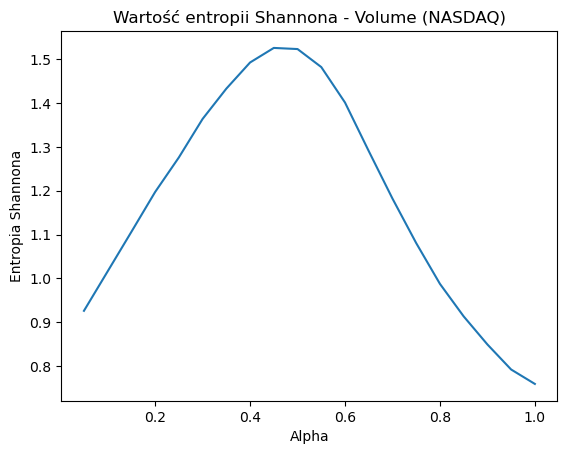

In [34]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Volume (NASDAQ)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

In [35]:
nasdaq = calculate_encoding(nasdaq.iloc[49:,:], 'Close', binary=True)
nasdaq = calculate_encoding(nasdaq, 'Volume', binary=True)
nasdaq

/home/persi/Desktop/quant/encoding.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'binary_encoding_{column}'] = 0


,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
2000-03-14,4706.629883,5013.490234,4706.609863,4997.310059,1977820000,0,0
2000-03-15,4582.620117,4758.439941,4553.919922,4758.439941,1937800000,-1,-1
2000-03-16,4717.390137,4717.759766,4455.100098,4658.439941,2041510000,1,1
2000-03-17,4798.129883,4805.939941,4702.029785,4702.029785,1691530000,1,-1
2000-03-20,4610.000000,4822.700195,4610.000000,4812.140137,1539860000,-1,-1
...,...,...,...,...,...,...,...
2025-03-20,17691.630859,17903.199219,17576.820312,17586.060547,6098330000,-1,-1
2025-03-21,17784.050781,17798.060547,17474.810547,17519.839844,8837930000,1,1
2025-03-24,18188.589844,18210.050781,18030.679688,18046.189453,6787790000,1,-1


In [36]:
print('Entropia Shannona dla Close:', calculate_entropy(nasdaq.iloc[1:,:], 'binary_encoding_Close'))
display(nasdaq.iloc[1:,:]['binary_encoding_Close'].value_counts(normalize=True))

print('Entropia Shannona dla Volume:', calculate_entropy(nasdaq.iloc[1:,:], 'binary_encoding_Volume'))
nasdaq.iloc[1:,:]['binary_encoding_Volume'].value_counts(normalize=True)


Entropia Shannona dla Close: 0.996936834184733


binary_encoding_Close
 1    0.542090
-1    0.457751
 0    0.000159
Name: proportion, dtype: float64


Entropia Shannona dla Volume: 1.002070682558693


binary_encoding_Volume
 1    0.501112
-1    0.498729
 0    0.000159
Name: proportion, dtype: float64

In [37]:
nasdaq.loc[nasdaq['binary_encoding_Close'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
2000-03-14,4706.629883,5013.490234,4706.609863,4997.310059,1977820000,0,0
2018-11-13,7200.870117,7319.120117,7182.859863,7230.689941,2361240000,0,1


In [38]:
nasdaq.loc[nasdaq['binary_encoding_Volume'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
2000-03-14,4706.629883,5013.490234,4706.609863,4997.310059,1977820000,0,0
2011-04-21,2820.159912,2820.770020,2808.550049,2820.770020,2094470000,1,0


Processing NASDAQ - Close with window size 5


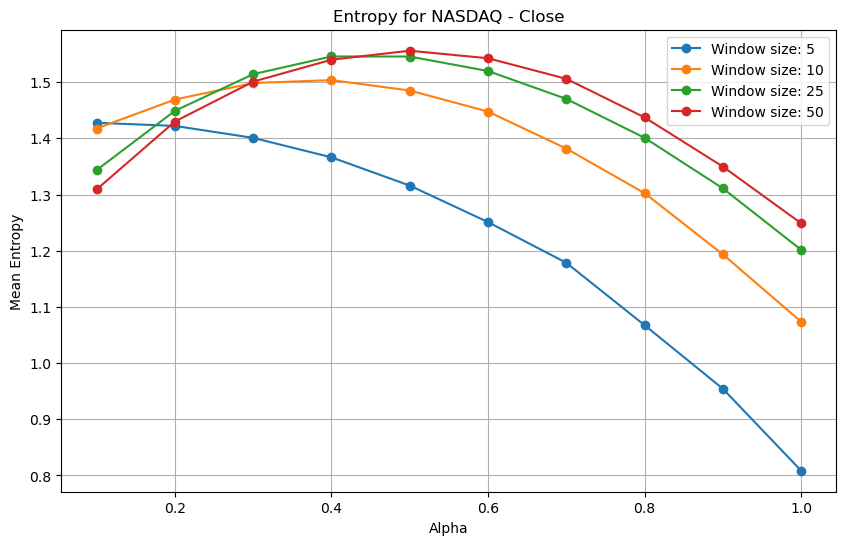

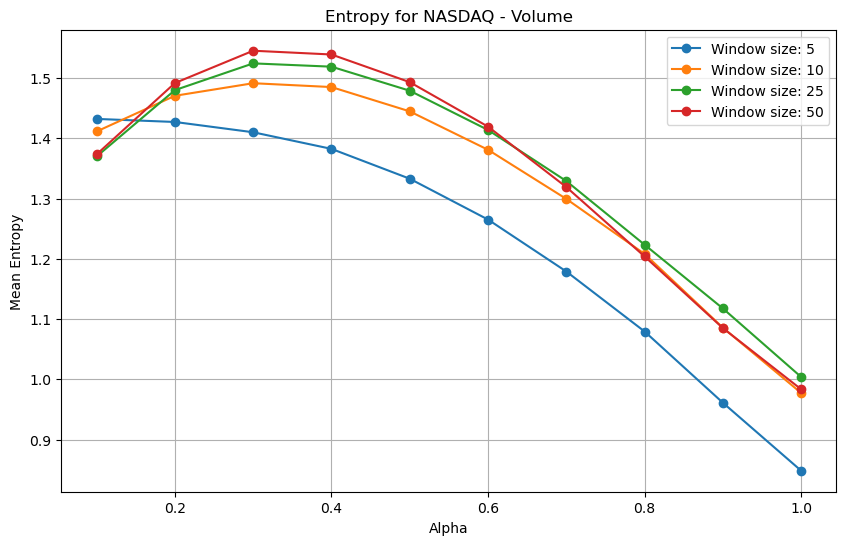

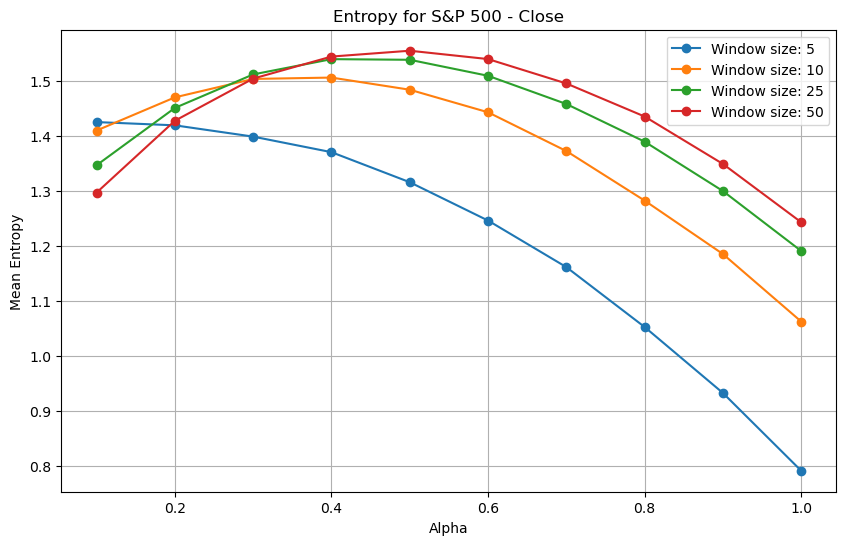

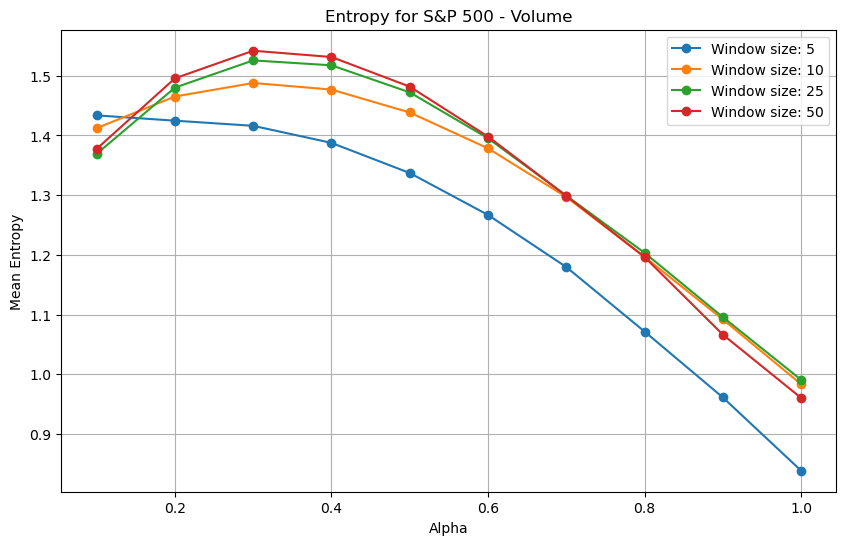

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import concurrent.futures

from encoding import moving_window_entropy

window_sizes = [5, 10, 25, 50]
alpha_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

datasets = {'NASDAQ': nasdaq, 'S&P 500': sp500}

def compute_entropy():
    results = {}
    for df_name, df in datasets.items():
        results[df_name] = {}
        for column in ['Close', 'Volume']:
            results[df_name][column] = {}
            for window_size in window_sizes:
                print(f"Processing {df_name} - {column} with window size {window_size}")
                entropy_values = moving_window_entropy(df, column, window_size, alpha_values)
                results[df_name][column][window_size] = {alpha: np.mean(values) 
                                                         for alpha, values in entropy_values.items()}
    return results

def plot_results(results):
    for df_name, df_results in results.items():
        for column, column_results in df_results.items():
            plt.figure(figsize=(10, 6))
            for window_size, entropy_values in column_results.items():
                mean_entropies = [entropy_values[alpha] for alpha in alpha_values]
                plt.plot(alpha_values, mean_entropies, marker='o', label=f'Window size: {window_size}')
            plt.title(f'Entropy for {df_name} - {column}')
            plt.xlabel('Alpha')
            plt.ylabel('Mean Entropy')
            plt.legend()
            plt.grid(True)
            plt.show()

if __name__ == "__main__":
    results = compute_entropy()
    
    with open('entropy_results.pkl', 'wb') as f:
        pickle.dump(results, f)
    
    with open('entropy_results.pkl', 'rb') as f:
        loaded_results = pickle.load(f)
    
    plot_results(loaded_results)

https://ieeexplore.ieee.org/document/8714662

https://jmotif.github.io/sax-vsm_site/morea/algorithm/SAX.html

Structural entropy